In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ipywidgets as widgets

# Demo: Hiển thị các Aisles, Department theo lựa chọn

# 1. Đọc dữ liệu

In [3]:
# Đọc kết quả đã phân tích trước đó
df = pd.read_csv('../data/aisle_deparment_counts.csv')
df.head(5)

,aisle_id,counts,aisle,department_id,department
0,1,15632,prepared soups salads,20,deli
1,13,21357,prepared meals,20,deli
2,14,28085,tofu meat alternatives,20,deli
3,67,76837,fresh dips tapenades,20,deli
4,96,85093,lunch meat,20,deli


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aisle_id       134 non-null    int64 
 1   counts         134 non-null    int64 
 2   aisle          134 non-null    object
 3   department_id  134 non-null    int64 
 4   department     134 non-null    object
dtypes: int64(3), object(2)
memory usage: 5.4+ KB


# 2. Thử vẽ biểu đồ Bar & Treemap cho 20 + 1 aisle

**Tạo bảng dữ liệu: 20 aisles nhiều nhất và phần còn lại**

In [5]:
# Sắp xếp theo số các sản phẩm đã bán được
df = df.sort_values('counts', ascending=False)
df.reset_index(drop=True, inplace=True)
df.head()

,aisle_id,counts,aisle,department_id,department
0,24,786888,fresh fruits,4,produce
1,83,737374,fresh vegetables,4,produce
2,123,381575,packaged vegetables fruits,4,produce
3,120,313279,yogurt,16,dairy eggs
4,21,211480,packaged cheese,16,dairy eggs


In [6]:
# Lấy ra 20 aisles có số lượng bán nhiều nhất, phần còn lại gom thành 1 nhóm riêng
N = 20
df1 = df[['counts', 'aisle']][0:N]
other_count = df['counts'][N:].sum()
print(other_count)

other = pd.DataFrame({'counts': [other_count], 'aisle': ['others']})
df1 = df1.append(other, ignore_index=True)
df1

2802620


C:\Users\NguyenMinhThuy\AppData\Local\Temp\ipykernel_12300\1907854206.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(other, ignore_index=True)


,counts,aisle
0,786888,fresh fruits
1,737374,fresh vegetables
2,381575,packaged vegetables fruits
3,313279,yogurt
4,211480,packaged cheese
5,192052,milk
6,181060,water seltzer sparkling water
7,156875,chips pretzels
8,138111,soy lactosefree
9,125989,bread


**Vẽ biểu đồ cột**

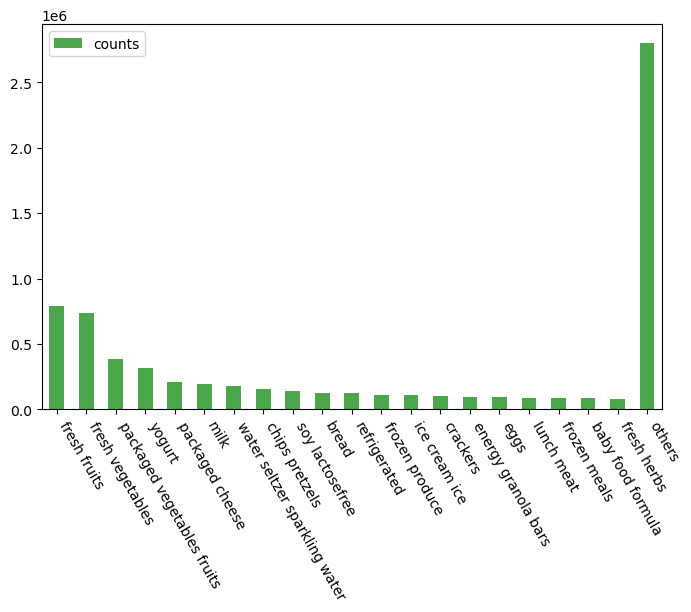

In [7]:
df1.plot.bar(y='counts', color='green', alpha=0.7, figsize=(8,5))
plt.xticks(df1.index, df1['aisle'], rotation=-60, ha='left')
plt.show()
plt.close('all')

**Vẽ biểu đồ Tree-Map**

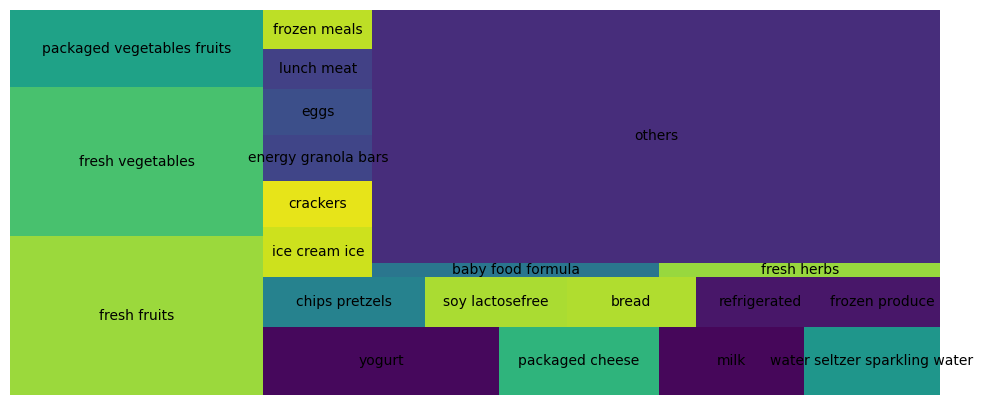

In [8]:
import squarify
fig,ax=plt.subplots(figsize=(12,5))
squarify.plot(sizes=df1['counts'], label=df1['aisle'])
plt.axis('off')
plt.show()
plt.close('all')

# 3. Tạo hàm vẽ Treemap, cho phép chọn N

In [9]:
@widgets.interact(N = (10,30,2)) # 10-30, step =2
def VeTreemap(N = 20):
    df2 = df[['counts', 'aisle']][0:N]
    other = pd.DataFrame({'counts': [df['counts'][N:].sum()], 'aisle': ['others']})
    df2 = df2.append(other, ignore_index=True)

    fig,ax=plt.subplots(figsize=(15,7))
    squarify.plot(sizes=df2['counts'], label=df2['aisle'])
    plt.axis('off')
    plt.show()
    plt.close('all')

interactive(children=(IntSlider(value=20, description='N', max=30, min=10, step=2), Output()), _dom_classes=('…

C:\Users\NguyenMinhThuy\AppData\Local\Temp\ipykernel_12300\4162013004.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(other, ignore_index=True)


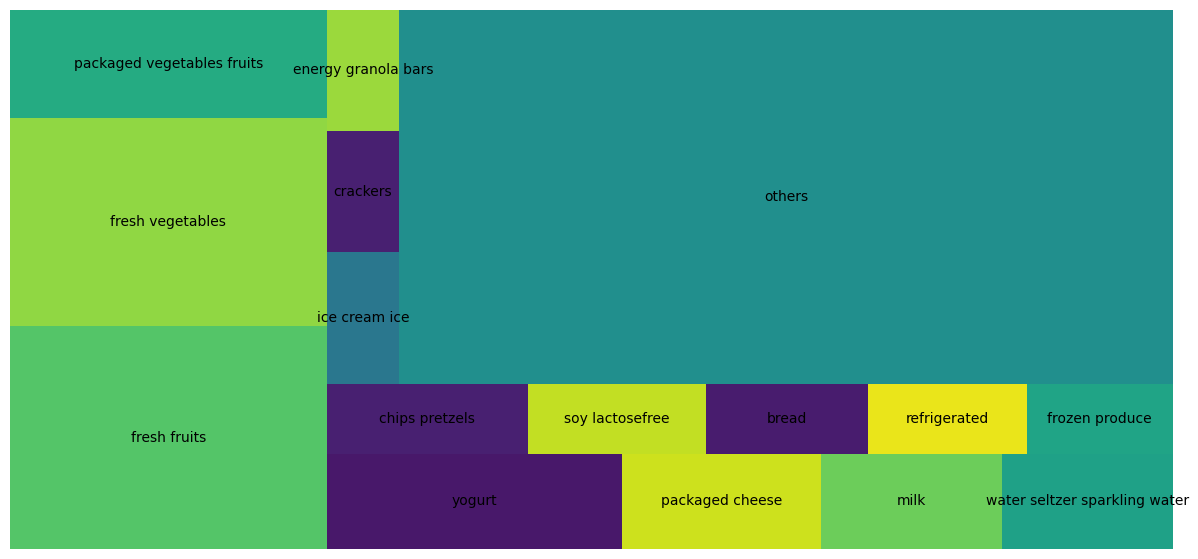

In [10]:
VeTreemap(N=15)

# 4. Vẽ biểu đồ treemap cho các Deparment

**Sắp xếp các Departments theo số lượng đã bán**

In [11]:
df_d = df[['department','counts']].groupby('department').sum()
df_d = df_d.sort_values('counts', ascending=False)
df_d.reset_index(inplace=True)
df_d

,department,counts
0,produce,2046990
1,dairy eggs,1168475
2,snacks,623318
3,beverages,579862
4,frozen,482633
5,pantry,404730
6,bakery,253775
7,canned goods,230207
8,deli,227004
9,dry goods pasta,186861


**Thử chọn ra 10 deparment bán được nhiều nhất và tính tổng phần còn lại**

In [12]:
N=10
df2 = df_d[['counts', 'department']][0:N]
other = pd.DataFrame({'counts': [df_d['counts'][N:].sum()], 
                      'department': ['others']}
                    )

df2 = df2.append(other, ignore_index=True)
df2

C:\Users\NguyenMinhThuy\AppData\Local\Temp\ipykernel_12300\1677721652.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(other, ignore_index=True)


,counts,department
0,2046990,produce
1,1168475,dairy eggs
2,623318,snacks
3,579862,beverages
4,482633,frozen
5,404730,pantry
6,253775,bakery
7,230207,canned goods
8,227004,deli
9,186861,dry goods pasta


**Tạo widgets để vẽ Treemap**

In [13]:
@widgets.interact(N = (10,20,1))
def VeTreemap(N = 10):
    df2 = df_d[['counts', 'department']][0:N]
    
    other_count = df_d['counts'][N:].sum()
    other = pd.DataFrame({'counts': [other_count], 'department': ['others']})
    df2 = df2.append(other, ignore_index=True)
    
    fig,ax=plt.subplots(figsize=(12,5))
    squarify.plot(sizes=df2['counts'], label=df2['department'])
    plt.axis('off')
    plt.show()
    plt.close('all')

interactive(children=(IntSlider(value=10, description='N', max=20, min=10), Output()), _dom_classes=('widget-i…

In [14]:
# Thêm widget để chọn bảng màu
cmaps = ['tab20', 'tab20b', 'viridis', 'YlOrRd', 'prism']

@widgets.interact(N = (10,20,1), ColorMap=cmaps)
def VeTreemap(N = 10, ColorMap=None):
    df2 = df_d[['counts', 'department']][0:N]
    
    other_count = df_d['counts'][N:].sum()
    other = pd.DataFrame({'counts': [other_count], 'department': ['others']})
    df2 = df2.append(other, ignore_index=True)
    
    if ColorMap:
        cmap=plt.get_cmap(ColorMap)
        colors = [cmap(v) for v in np.linspace(0,1,N)][::-1]
    else: colors = None

    fig,ax=plt.subplots(figsize=(12,5))
    squarify.plot(sizes=df2['counts'], label=df2['department'], color=colors)
    plt.axis('off')
    plt.show()
    plt.close('all')

interactive(children=(IntSlider(value=10, description='N', max=20, min=10), Dropdown(description='ColorMap', o…

# 5. Vẽ biểu đồ cho phép chọn từng department

**Chuẩn bị dữ liệu**

In [15]:
# Tính ra số lượng sản phẩm đã bán được theo từng aisle của từng department
df3 = df[['department', 'aisle', 'counts']].groupby(['department', 'aisle']).sum()
df3

counts
department aisle                             
alcohol    beers coolers                10609
           red wines                     7823
           specialty wines champagnes    2413
           spirits                       5939
           white wines                   6634
...                                       ...
snacks     ice cream toppings            2372
           mint gum                      4840
           nuts seeds dried fruit       65980
           popcorn jerky                35179
           trail mix snack mix           7686

[134 rows x 1 columns]

**Thử lấy ra một department**

In [16]:
# Dùng hàm 'loc'
df3.loc['alcohol']

,counts
aisle,
beers coolers,10609
red wines,7823
specialty wines champagnes,2413
spirits,5939
white wines,6634


In [17]:
# Cách mới: Dùng hàm slice lấy ra nhóm và droplevel để bỏ đi tên nhóm
df3[slice('alcohol')].droplevel(0) # nếu chỉ slice, sẽ lấy luôn index

,counts
aisle,
beers coolers,10609
red wines,7823
specialty wines champagnes,2413
spirits,5939
white wines,6634


**Thêm widget để chọn department**

In [18]:
# Chỉ chọn 10 department bán được nhiều sản phẩm nhất
dep_list = list(df_d['department'].iloc[0:10].values)

@widgets.interact(dep_name=dep_list)
def Ve_BD_Theo_Dep(dep_name):
    new_df = df3.loc[dep_name].reset_index()
    
    fig = plt.figure(figsize=(8,5))
    ax = sns.barplot(data=new_df, x=new_df.index, y='counts', 
                palette='bright',
               )
    ax.set_xticklabels(new_df['aisle'], rotation=-60, ha='left')
    plt.title(dep_name)
    plt.show()
    plt.close('all')
#Ve_BD_Theo_Dep('alcohol')

interactive(children=(Dropdown(description='dep_name', options=('produce', 'dairy eggs', 'snacks', 'beverages'…